# DataStory "ChartLyrics"

Ina Widmer, Michael Job

Do Social Media words appear in Chartlyrics ?

Source of swiss charts:

In [3]:
Image(url='https://hitparade.ch/images/header_logo.png')

Source of lyrics:

In [6]:
from IPython.display import IFrame
IFrame(src='https://lyrics.ovh/', width=700, height=300)

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

#  Analyse swiss charts data
#  from 7.10.2018 until 4.10.1998

### read json data from file into pandas object
path2data = 'data/charts_lyrics_1998-2018.json'
data = pd.read_json(path_or_buf=path2data, orient=None, typ='frame', dtype=True, convert_axes=True, convert_dates=True,
                 keep_default_dates=True, numpy=False, precise_float=False, date_unit=None, encoding='utf-8',
                 lines=False, chunksize=None, compression='infer')


In [9]:
## Get n most common words for data
def get_top_n_words(lyrics, n=None):
    vec = CountVectorizer(stop_words='english').fit(lyrics)
    bag_of_words = vec.transform(lyrics)    # matrix where each row represents a specific text
    sum_words = bag_of_words.sum(axis=0)    # vector that contains the sum of each word occurrence
    words_freq = pd.DataFrame([(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()], columns=['word', 'occurrence'])
    words_freq = words_freq.sort_values(by=['occurrence'], ascending=False)
    return words_freq.head(n)

In [10]:
### Descriptive stats of words for all data (1998 - 2018)
## Get all words
df_all = get_top_n_words(data.lyrics)
print("All words:")
df_all.describe()


All words:


,occurrence
count,22138.000000
mean,15.842036
std,113.251787
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,5366.000000


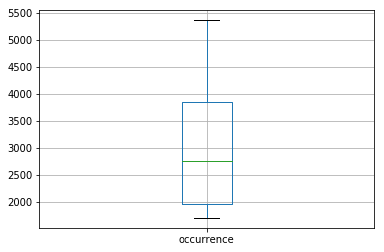

In [13]:
## Get top 20 words
top20_words = get_top_n_words(data.lyrics, 20)
top20_words.boxplot()
plt.show()

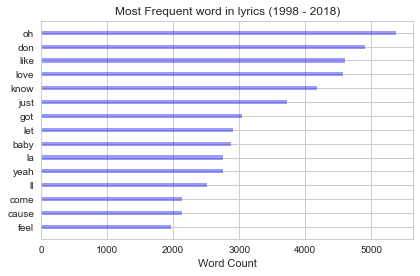

In [11]:
### Plot Top words for all Data (1998 - 2018)
common_words = get_top_n_words(data.lyrics, 15) ## Get n most common words
common_words = common_words.sort_values(by=['occurrence'])
nr_words = len(common_words)

fig, ax = plt.subplots()
index = np.arange(nr_words)
bar_width = 0.3
opacity = 0.4

rec = plt.barh(index, common_words['occurrence'], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Ocurrences')

plt.xlabel('Word Count')
plt.title('Most Frequent word in lyrics (1998 - 2018)')
plt.yticks(index, common_words['word'])
plt.tight_layout()


In [12]:
def getWordCountPerYear(word):
    # Partition data into years
    years = [g for n, g in data.set_index('date').groupby(pd.Grouper(freq='Y'))]

    wordFreq = pd.DataFrame(columns=['year','occurrence'])
    # Get most common words for each year
    for i in range(len(years) - 1):
        common_words = get_top_n_words(years[i].lyrics)
        # Find count for word
        record = common_words[common_words['word'] == word]
        
        # if word doesn't exist set occurrence to 0
        if record.empty: 
            occurrence = 0 
        else:
            occurrence = record.occurrence.values[0]
        wordFreq = wordFreq.append({'year': years[i].index[0].year,'occurrence': occurrence}, ignore_index=True)
    return wordFreq

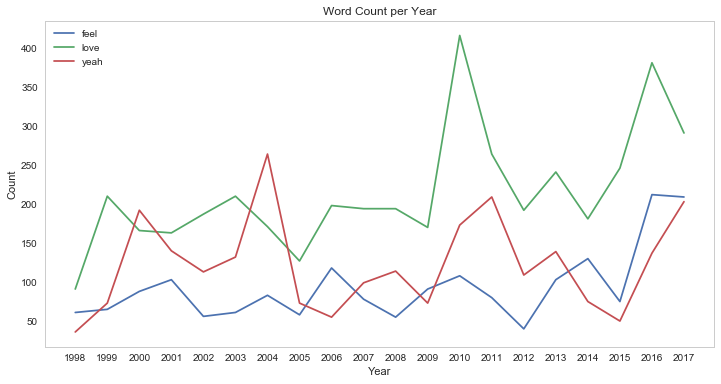

In [40]:
## Get count per year for specific words
feel = getWordCountPerYear("feel")
love = getWordCountPerYear("love")
yeah = getWordCountPerYear("yeah")

# Plot word count 
plt.figure(figsize=(12,6))  # sets the window to 10 x 6 inches
plt.title('Word Count per Year')
plt.plot(feel['year'], feel['occurrence'], label = 'feel')
plt.plot(love['year'], love['occurrence'], label = 'love')
plt.plot(yeah['year'], yeah['occurrence'], label = 'yeah')
plt.xticks(np.arange(min(feel['year']), max(feel['year'])+1, 1.0))
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid()
plt.legend()
plt.show()

In [21]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stopwords = set(STOPWORDS)
text = " ".join(lyrics for lyrics in data.lyrics)
print ("There are {} words in the combination of all lyrics.".format(len(text)))
wordcloud = WordCloud(stopwords=stopwords, width=1200, height=900, max_font_size=150, max_words=100, background_color="white", collocations=False).generate(text)

There are 3530835 words in the combination of all lyrics.


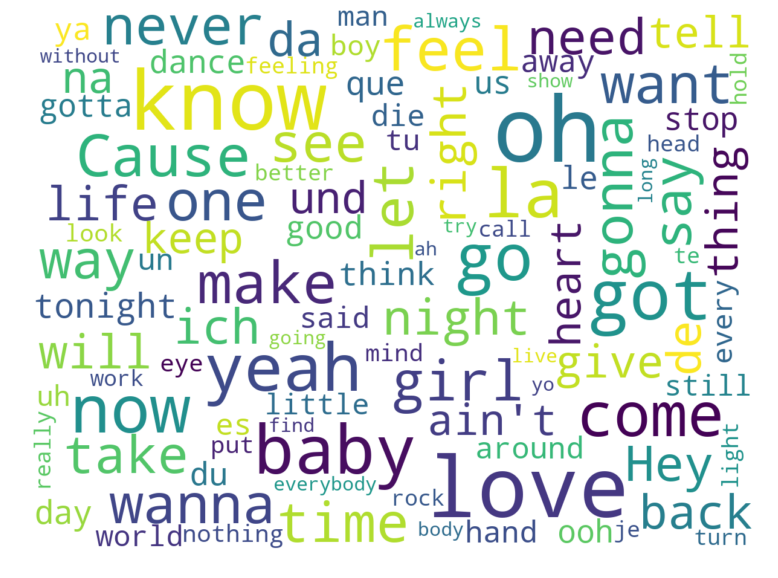

In [22]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()